#UTS PENAMBANGAN DATA B

##IMPLEMENTASI MENGGUNAKAN KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#mengimpor atau mengambil library pada pandas, numpy, seaborn, dan matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url = '/content/drive/MyDrive/datamining/tugas/dataR2.csv'
dataset = pd.read_csv(url)

dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
dataset.shape

(116, 10)

In [ ]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['Classification'])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#separate target values
y = dataset['Classification'].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

MENGGUNAKAN METODE DESSICION TREE

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [8]:
url = '/content/drive/MyDrive/datamining/tugas/dataR2.csv'
dataset = pd.read_csv(url)

dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [10]:
y = dataset["Classification"]
X = dataset.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

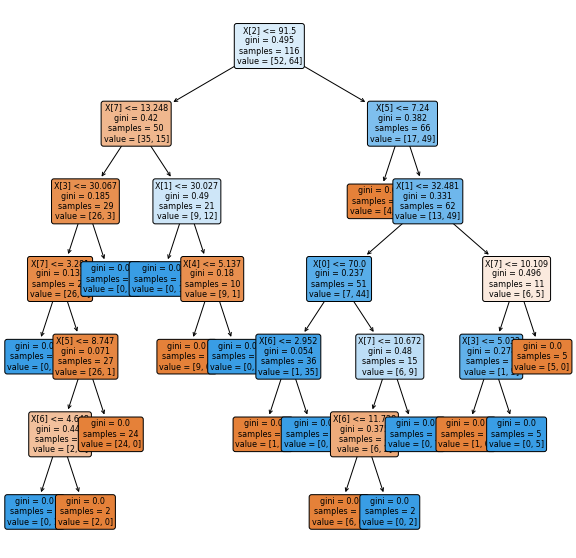

In [11]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

In [12]:
url = '/content/drive/MyDrive/datamining/tugas/dataR2.csv'
dataset = pd.read_csv(url)

dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enc = LabelEncoder()

In [25]:
dataset['Age']=enc.fit_transform(dataset['Age'].values)
dataset['BMI']=enc.fit_transform(dataset['BMI'].values)
dataset['Glucose']=enc.fit_transform(dataset['Glucose'].values)
dataset['Insulin']=enc.fit_transform(dataset['Insulin'].values)
dataset['HOMA']=enc.fit_transform(dataset['HOMA'].values)
dataset['Leptin']=enc.fit_transform(dataset['Leptin'].values)
dataset['Adiponectin']=enc.fit_transform(dataset['Adiponectin'].values)
dataset['Resistin']=enc.fit_transform(dataset['Resistin'].values)
dataset['MCP.1']=enc.fit_transform(dataset['MCP.1'].values)

In [18]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,33,70,3,0,14,68,37,53,1
1,83,5,92,9,13,15,26,4,57,1
2,82,30,91,33,34,50,108,45,67,1
3,68,14,77,11,7,21,41,66,104,1
4,86,11,92,19,23,4,20,56,93,1


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             116 non-null    int64
 1   BMI             116 non-null    int64
 2   Glucose         116 non-null    int64
 3   Insulin         116 non-null    int64
 4   HOMA            116 non-null    int64
 5   Leptin          116 non-null    int64
 6   Adiponectin     116 non-null    int64
 7   Resistin        116 non-null    int64
 8   MCP.1           116 non-null    int64
 9   Classification  116 non-null    int64
dtypes: int64(10)
memory usage: 9.2 KB


In [27]:
data_array=dataset.drop(columns='Classification')
data_array.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,17,33,1,3,0,14,68,37,53
1,47,5,19,9,13,15,26,4,57
2,46,30,18,33,34,50,108,45,67
3,35,14,5,11,7,21,41,66,104
4,49,11,19,19,23,4,20,56,93


In [28]:
data_kelas=dataset['Classification']
data_kelas.head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    2
96    2
97    2
98    2
99    2
Name: Classification, Length: 100, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(data_array, data_kelas, test_size=0.2, random_state=500)
tree_data=DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=500)